In [144]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('agg')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

%matplotlib inline

sns.set(style = 'whitegrid')

np.random.seed(42)

In [145]:
df = pd.read_csv('Fashion(Data Points) - Form responses 1.csv')

In [146]:
df.head()

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices\n,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN
1,21/01/2025 22:13:55,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Dark tones (navy, maroon)",Slightly prefer functionality,Mix-and-match (varied styles),Every few months,Sustainability,Thrift stores,- Occasionally (a few times a year),Sometimes experiment,Sandals/Flats,Moderately active,- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN
2,21/01/2025 22:24:31,18–24,Female,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer functionality,Minimalist (few versatile pieces),Monthly,Comfort,Local boutiques,- Occasionally (a few times a year),Rarely experiment,Sneakers,Moderately active,- Extremely important,"Mostly timeless, some trendy",9.0,NaN,NaN
3,21/01/2025 22:25:53,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Equal balance of both,Specialized (specific to one style),Every few months,Comfort,Thrift stores,- Rarely (less than once a year),Sometimes experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,Always timeless,6.0,NaN,NaN
4,21/01/2025 22:38:46,18–24,Male,Student,"Casual (e.g., jeans, t-shirts)","Neutral (black, white, beige)",Slightly prefer aesthetics,Minimalist (few versatile pieces),Rarely,Comfort,Thrift stores,- Occasionally (a few times a year),Rarely experiment,Sneakers,"Very active (e.g., gym, outdoor activities)",- Somewhat important,"Mostly timeless, some trendy",6.0,NaN,NaN


In [147]:
df.shape

(150, 20)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

In [149]:
df.columns = df.columns.str.strip()

In [150]:
df.head(1)

,Timestamp,1.Age Group,2.Gender,3.Profession,Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),5. What’s your favorite color palette for clothing?,6. Do you prioritize functionality or aesthetics in your outfits?,7.Which of these best describes your wardrobe?,Section 3: Shopping Habits\n8. How often do you shop for new clothes?,9.What influences your clothing purchases the most?,10. Where do you typically shop for clothes? (Select all that apply),Section 4: Lifestyle\n11. How often do you attend formal events?,12.Do you often experiment with new styles or stick to what you know?,13. What kind of footwear do you wear most often?,14. How active is your daily lifestyle?,Section 5: Personal Preferences\n15. How important is comfort in your clothing choices,"16.If you had to choose, would you prefer timeless pieces or trendy items?",17. From scale 1-10 how much do you think your clothing style reflects about your personality?,Section 2: Style Preferences,Column 18
0,14/01/2025 19:33:18,18–24,Female,Student,"Chic (e.g., tailored, stylish)","Pastels (soft pink, baby blue)",Slightly prefer aesthetics,Mix-and-match (varied styles),Rarely,Comfort,Local boutiques,- Occasionally (a few times a year),Sometimes experiment,Sneakers,Mostly sedentary,- Extremely important,"Mostly trendy, some timeless",8.0,NaN,NaN


In [151]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [152]:
df.isnull().sum()

,0
Timestamp,0
1.Age Group,0
2.Gender,0
3.Profession,0
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),1
5. What’s your favorite color palette for clothing?,0
6. Do you prioritize functionality or aesthetics in your outfits?,1
7.Which of these best describes your wardrobe?,2
Section 3: Shopping Habits\n8. How often do you shop for new clothes?,1
9.What influences your clothing purchases the most?,2


In [153]:
df.drop('Section 2: Style Preferences', axis = 1, inplace = True)
df.drop('Column 18', axis = 1, inplace = True)

In [154]:
df.dropna(inplace = True)

In [155]:
df.isnull().sum()

,0
Timestamp,0
1.Age Group,0
2.Gender,0
3.Profession,0
Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one),0
5. What’s your favorite color palette for clothing?,0
6. Do you prioritize functionality or aesthetics in your outfits?,0
7.Which of these best describes your wardrobe?,0
Section 3: Shopping Habits\n8. How often do you shop for new clothes?,0
9.What influences your clothing purchases the most?,0


In [156]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'float64')

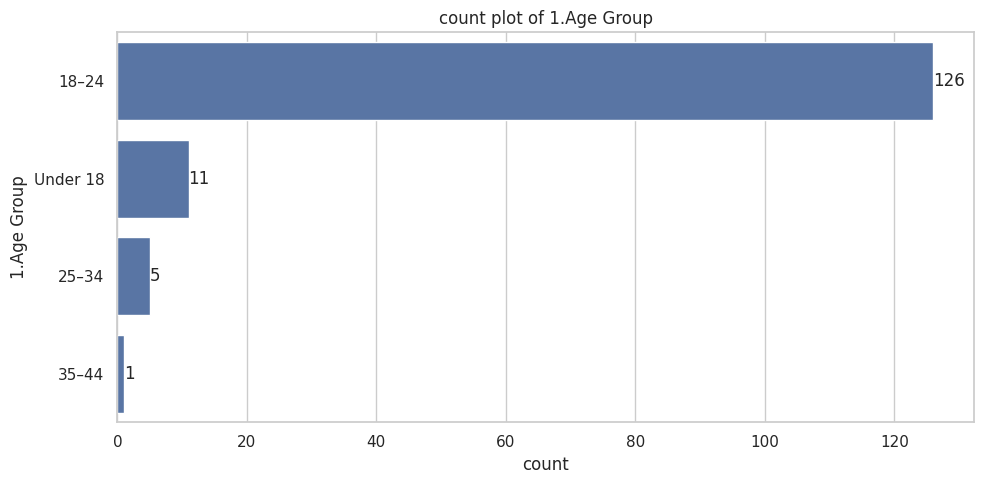

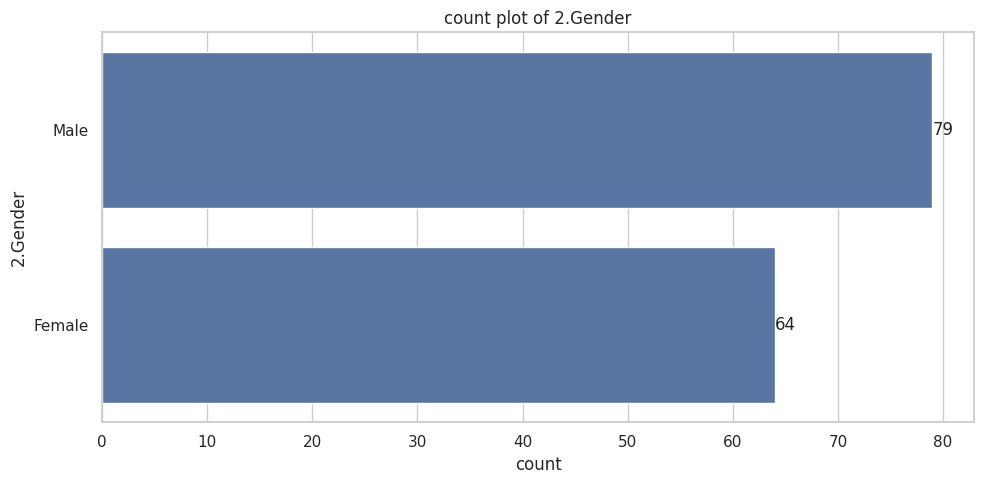

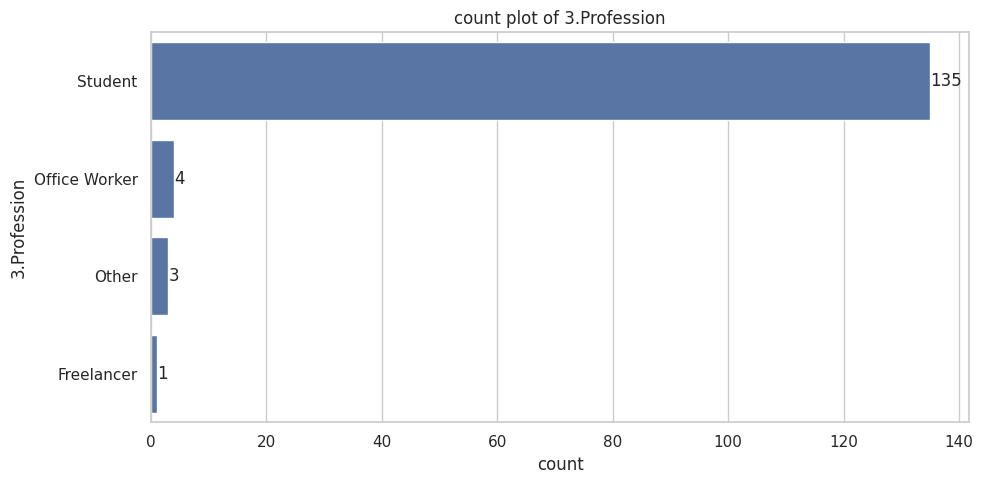

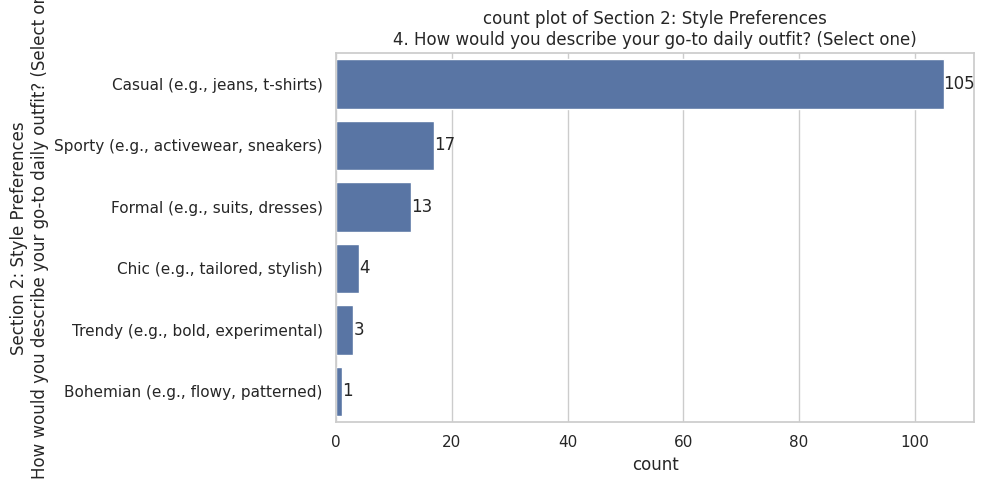

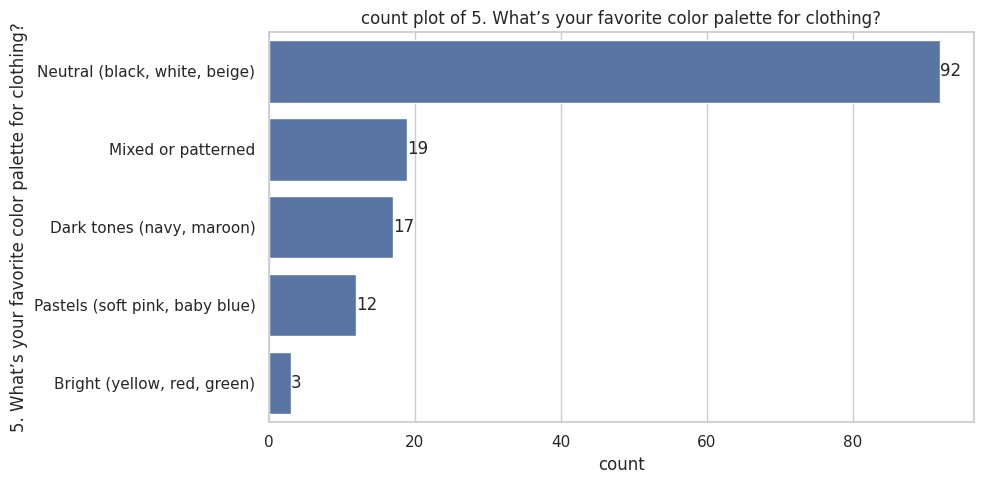

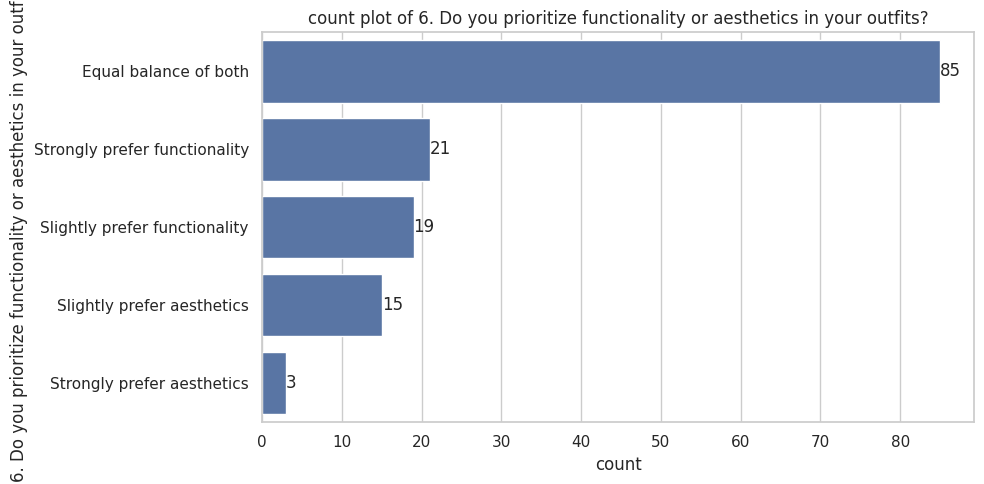

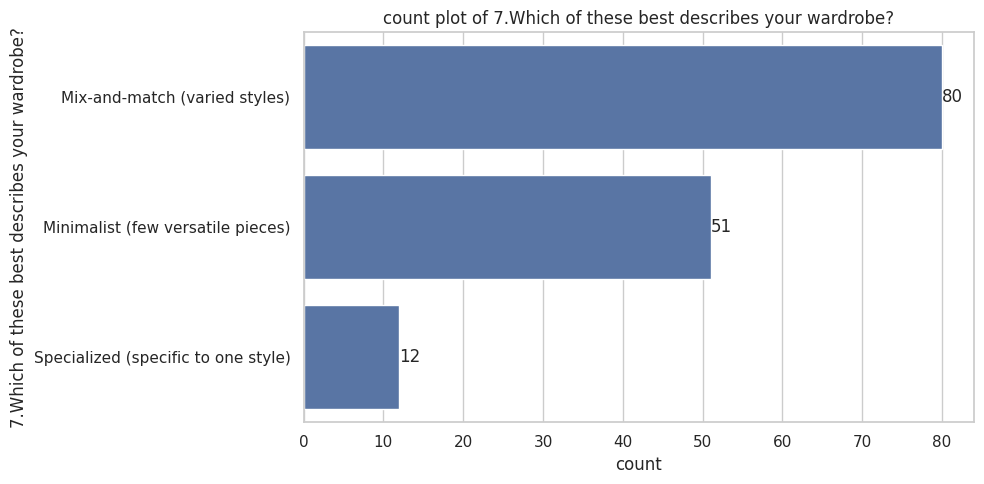

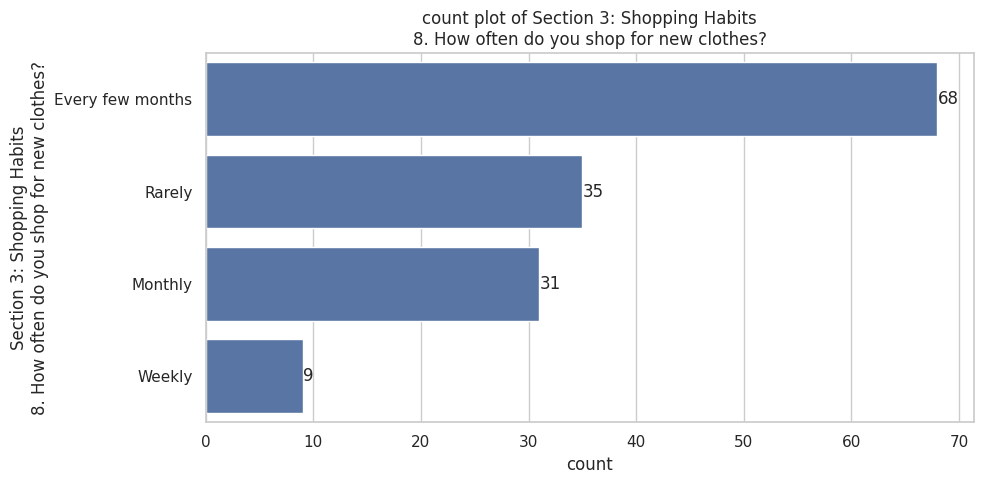

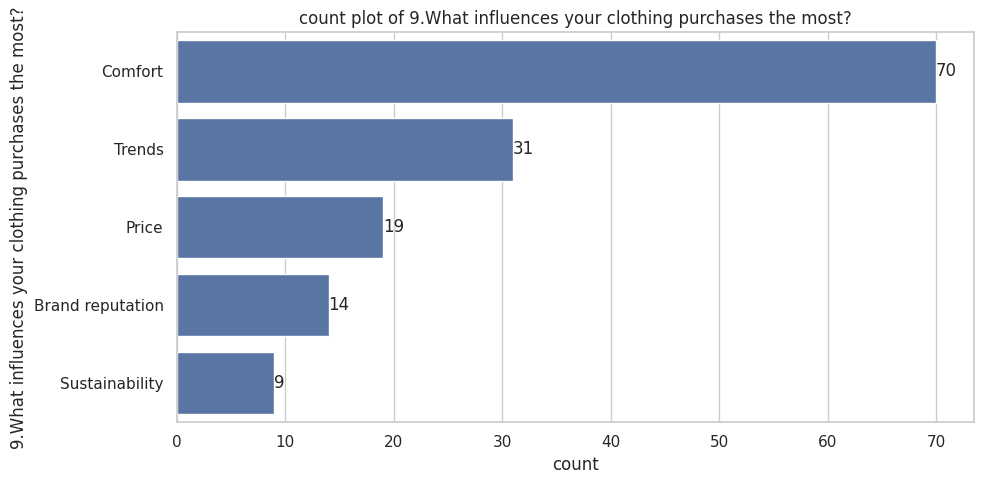

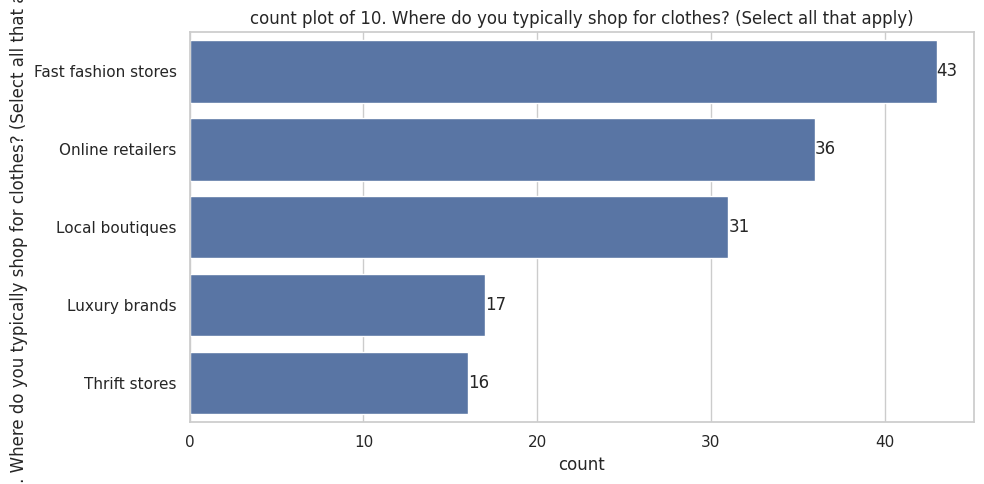

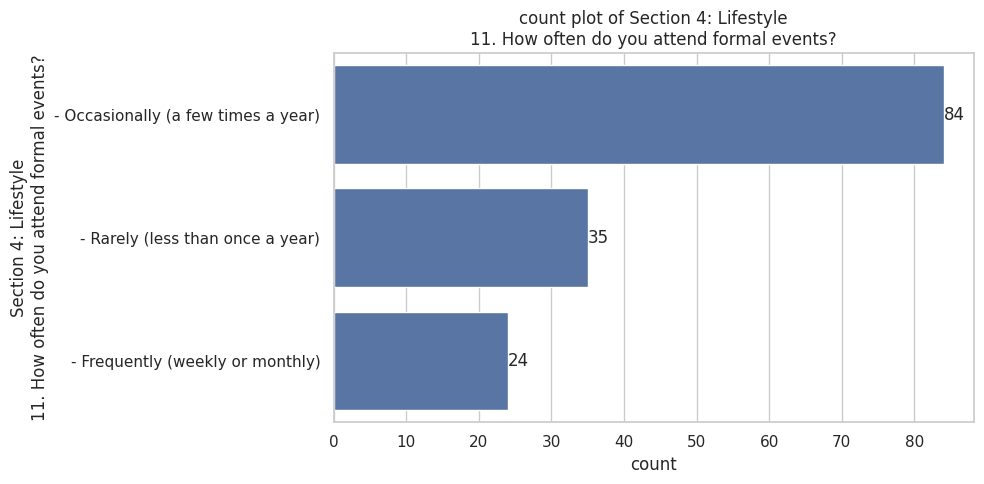

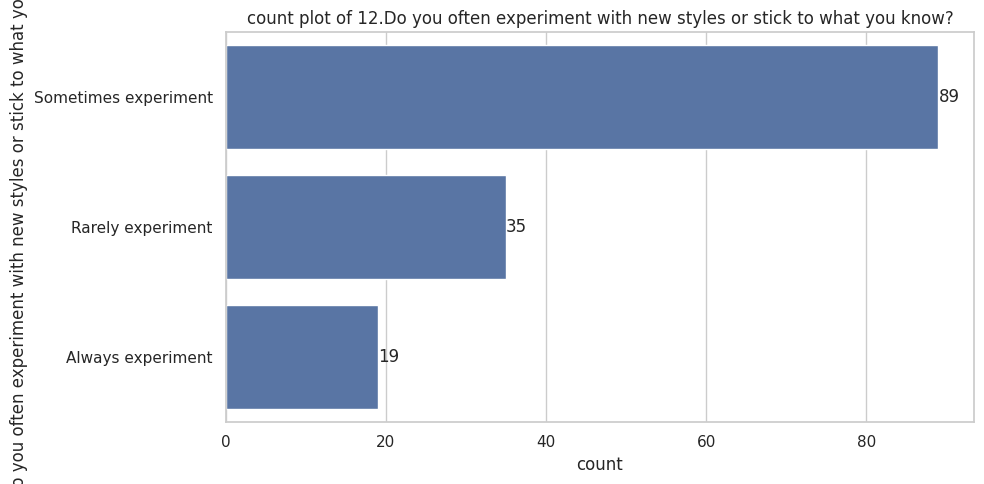

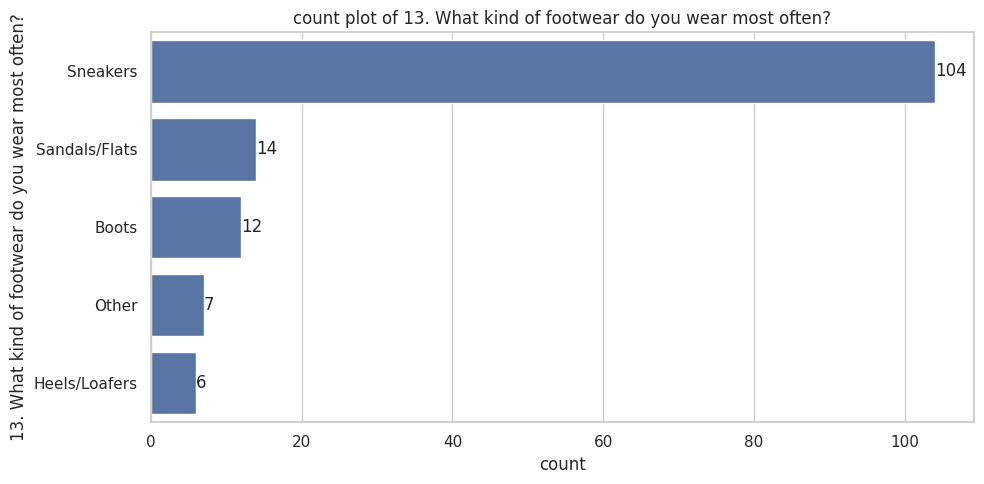

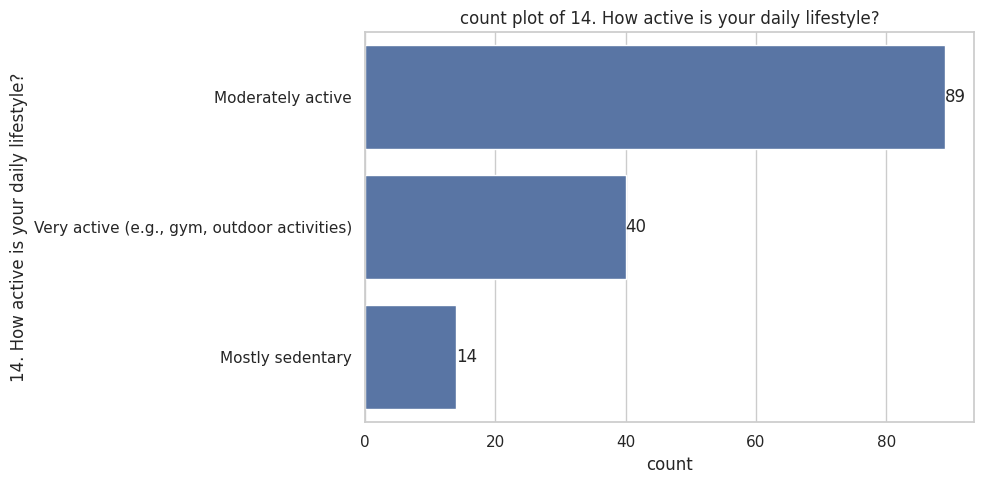

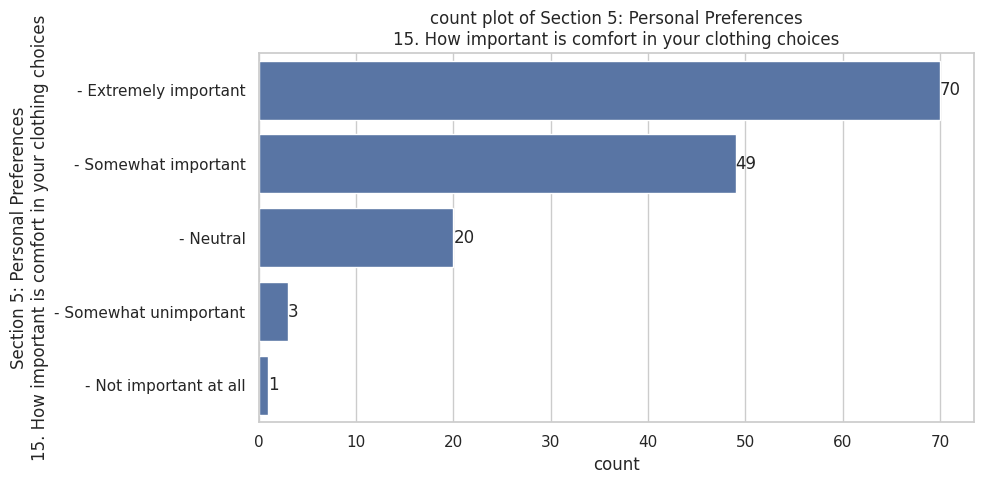

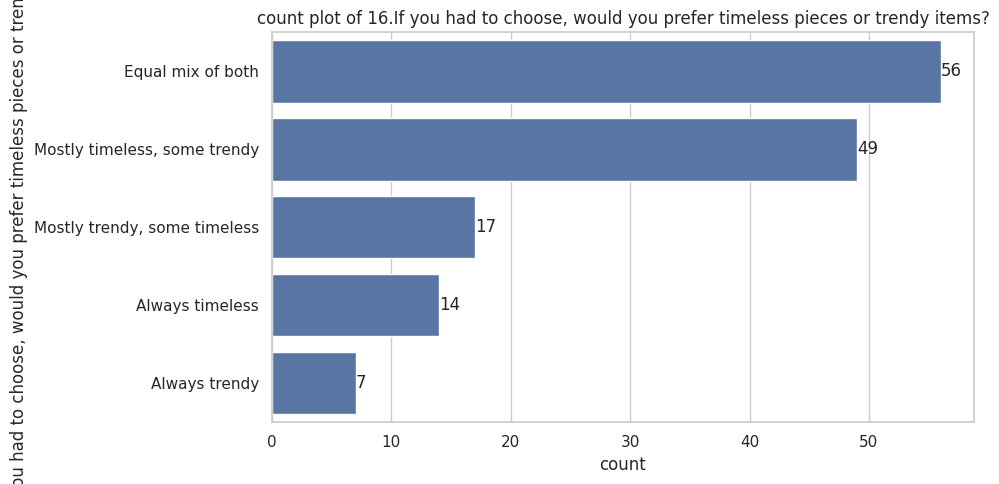

In [157]:
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

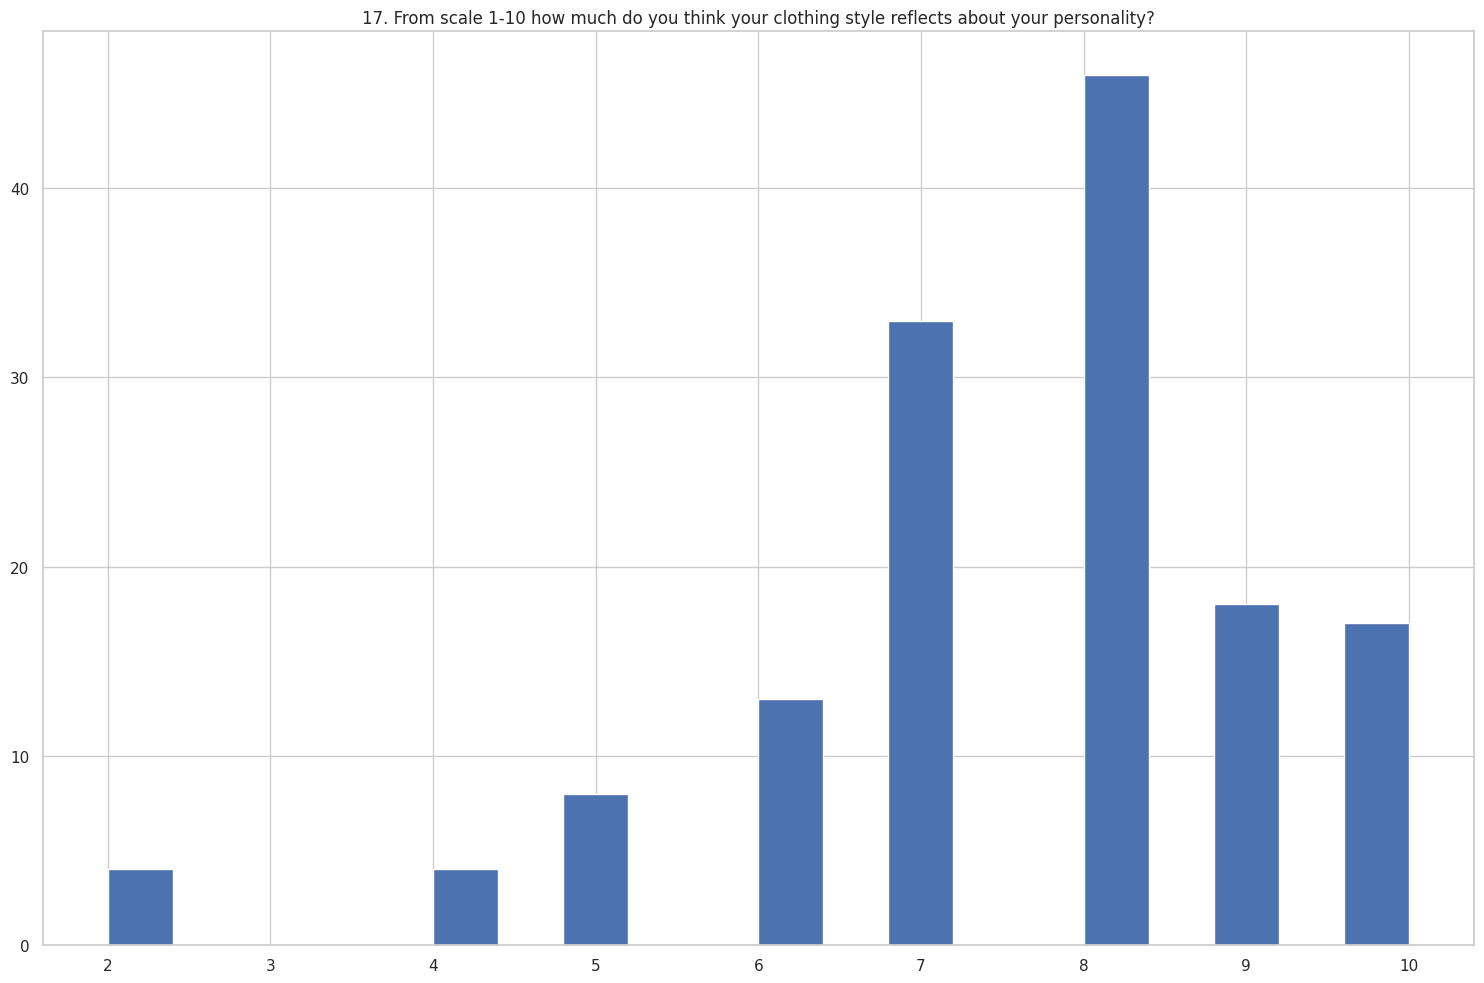

In [158]:
if numerical.shape[1]>0:
  numerical.hist(figsize = (15,10),bins = 20)
  plt.tight_layout()
  plt.show()


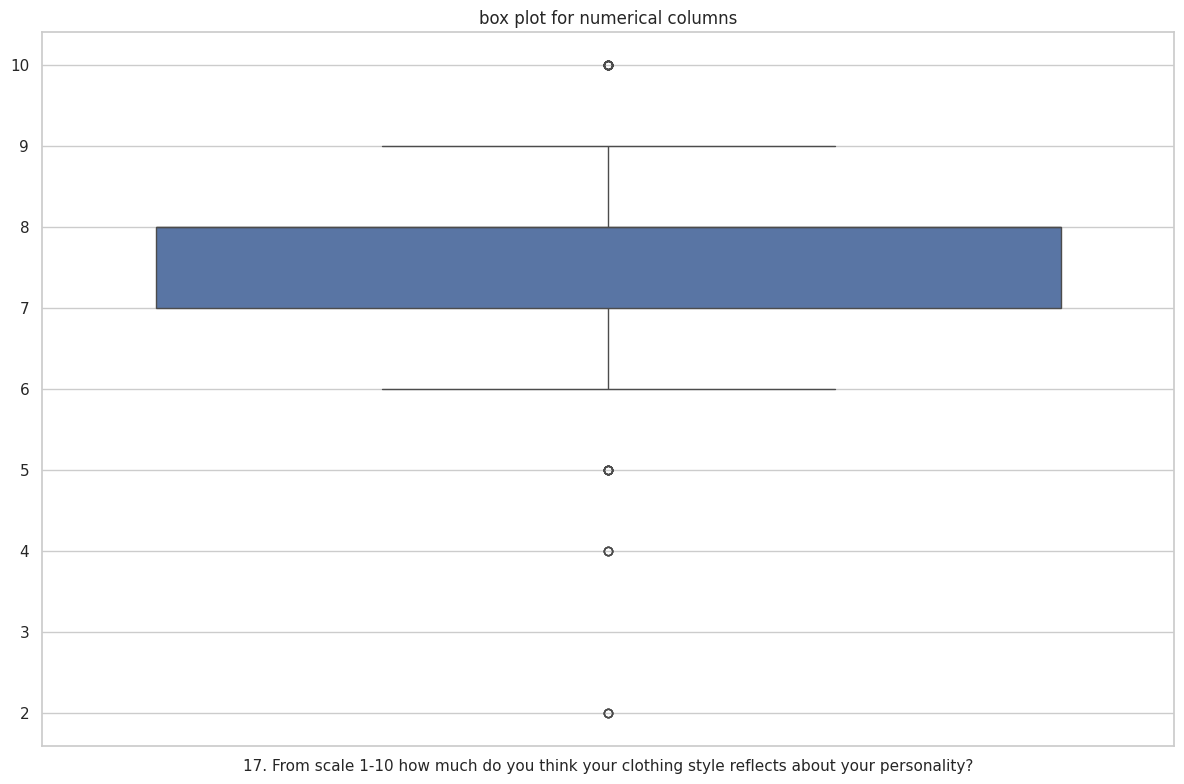

In [159]:
if numerical.shape[1]>0:
  plt.figure(figsize= (12,8))
  sns.boxplot(data = numerical)
  plt.title("box plot for numerical columns")
  plt.tight_layout()
  plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                                                                                          Non-Null Count  Dtype         
---  ------                                                                                          --------------  -----         
 0   Timestamp                                                                                       143 non-null    datetime64[ns]
 1   1.Age Group                                                                                     143 non-null    object        
 2   2.Gender                                                                                        143 non-null    object        
 3   3.Profession                                                                                    143 non-null    object        
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    143 non

In [161]:
target_column = '17. From scale 1-10 how much do you think your clothing style reflects about your personality?'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")

In [162]:
predicting_columns = ['1.Age Group','2.Gender','3.Profession']

In [163]:
for col in predicting_columns:
  if col not in df.columns:
    raise ValueError(f"Predicting column '{col}' not found in the DataFrame.")

In [164]:
df_model = df[predicting_columns + [target_column]]

In [165]:
df_model.head()

,1.Age Group,2.Gender,3.Profession,17. From scale 1-10 how much do you think your clothing style reflects about your personality?
0,18–24,Female,Student,8.0
1,18–24,Female,Student,6.0
2,18–24,Female,Student,9.0
3,18–24,Male,Student,6.0
4,18–24,Male,Student,6.0


In [166]:
df_model = pd.get_dummies(df_model, drop_first = True)

In [167]:
df_model.head()

,17. From scale 1-10 how much do you think your clothing style reflects about your personality?,1.Age Group_25–34,1.Age Group_35–44,1.Age Group_Under 18,2.Gender_Male,3.Profession_Office Worker,3.Profession_Other,3.Profession_Student
0,8.0,False,False,False,False,False,False,True
1,6.0,False,False,False,False,False,False,True
2,9.0,False,False,False,False,False,False,True
3,6.0,False,False,False,True,False,False,True
4,6.0,False,False,False,True,False,False,True


In [168]:
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})

In [169]:
df_model.head()

,17. From scale 1-10 how much do you think your clothing style reflects about your personality?,1.Age Group_25–34,1.Age Group_35–44,1.Age Group_Under 18,2.Gender_Male,3.Profession_Office Worker,3.Profession_Other,3.Profession_Student
0,8.0,0,0,0,0,0,0,1
1,6.0,0,0,0,0,0,0,1
2,9.0,0,0,0,0,0,0,1
3,6.0,0,0,0,1,0,0,1
4,6.0,0,0,0,1,0,0,1
